<a href="https://colab.research.google.com/github/negrete-93/Metodo-de-Minimos-Cuadrados/blob/main/Metodo_de_minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método de Mínimos Cuadrados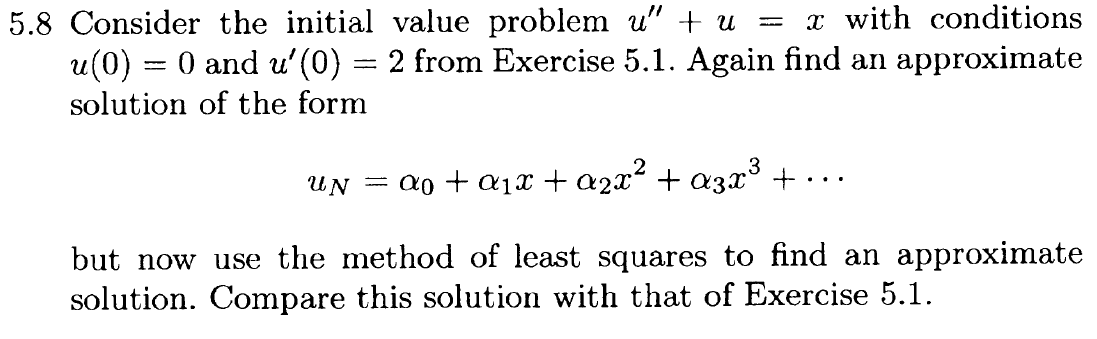

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Definimos las variables simbólicas
x, a, b = sp.symbols('x a b')
u = sp.Function('u')

In [18]:
#Solución
ode = u(x).diff(x,2) + u(x) - x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Definimos las condiciones:

In [22]:
#Condiciones
sol = sp.dsolve(ode, ics={u(0): 0, u(x).diff(x).subs(x,0):2})
sol

Eq(u(x), x + sin(x))

In [23]:
#Solución exacta
u_exacta_expr = sol.rhs
u_num = sp.lambdify(x, u_exacta_expr, 'numpy')

Definimos la función de prueba:

In [25]:
#Función de prueba
alpha_0 = 0
alpha_1 = 2
u_n = alpha_0 + alpha_1 * x + a * x**2 + b * x**3
u_n

a*x**2 + b*x**3 + 2*x

Calculamos el residual (Error de aproximación)

In [5]:
# ===========================
# RESIDUAL
# ===========================
u_n_2 = sp.diff(u_n, x, 2)
E = u_n_2 + u_n - x
E = sp.simplify(E)

print("\nResidual E(x):")
sp.pprint(E)


Residual E(x):
   2            3            
a⋅x  + 2⋅a + b⋅x  + 6⋅b⋅x + x


Calculamos el funcional del error que mide el área total del error al cuadrado sobre el intervalo:


In [26]:
J = sp.integrate(E**2, (x, 0, 1))
J = sp.simplify(J)

print("\nFuncional J(a,b) = ∫ E² dx:")
sp.pprint(J)


Funcional J(a,b) = ∫ E² dx:
    2                       2           
83⋅a    49⋅a⋅b   5⋅a   509⋅b    22⋅b   1
───── + ────── + ─── + ────── + ──── + ─
 15       3       2      35      5     3


Al minimizar el funcional del error, obtenemos las ecuaciones normales:

In [7]:
#Identificamos las ecuaciones normales
dJ_da = sp.diff(J, a)
dJ_db = sp.diff(J, b)

print("\nEcuación ∂J/∂a = 0:")
sp.pprint(dJ_da)

print("\nEcuación ∂J/∂b = 0:")
sp.pprint(dJ_db)


Ecuación ∂J/∂a = 0:
166⋅a   49⋅b   5
───── + ──── + ─
 15      3     2

Ecuación ∂J/∂b = 0:
49⋅a   1018⋅b   22
──── + ────── + ──
 3       35     5 


Resolvemos el sistema

In [8]:
#Solución al sistema
sol_ls = sp.solve([dJ_da, dJ_db], [a, b])

a_val = sol_ls[a]
b_val = sol_ls[b]

print("\nCoeficientes por mínimos cuadrados:")
print(f"a₂ = {a_val.evalf()}")
print(f"a₃ = {b_val.evalf()}")


Coeficientes por mínimos cuadrados:
a₂ = -0.0153821336805356
a₃ = -0.142639044118494


Aproximamos la función final

In [28]:
u_aprox_expr = u_n.subs({a: a_val, b: b_val})
u_aprox_num = sp.lambdify(x, u_aprox_expr, 'numpy')

print("\nAproximación por mínimos cuadrados:")
sp.pprint(u_aprox_expr.expand())


Aproximación por mínimos cuadrados:
         3         2      
  24759⋅x    1335⋅x       
- ──────── - ─────── + 2⋅x
   173578     86789       


Comparamos la solución exacta con la solución aproximada

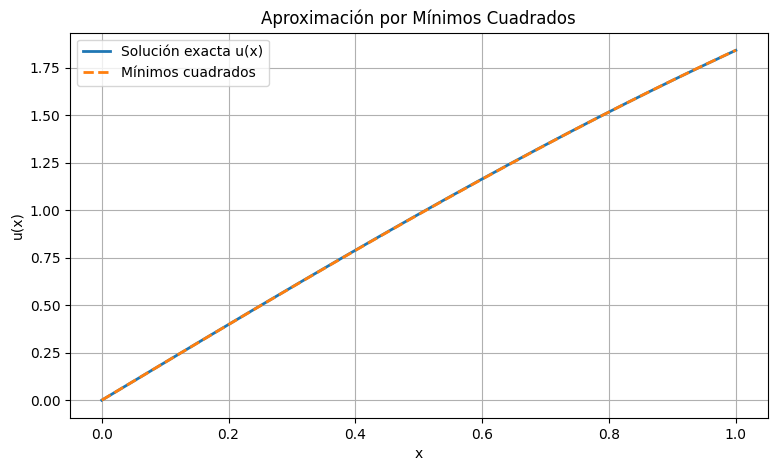

In [10]:
#Grafica de la comparación de la solución exacta con la aproximada
xx = np.linspace(0, 1, 200)
yy_exacta = u_num(xx)
yy_aprox = u_aprox_num(xx)

plt.figure(figsize=(9,5))
plt.plot(xx, yy_exacta, label="Solución exacta u(x)", linewidth=2)
plt.plot(xx, yy_aprox, '--', label="Mínimos cuadrados", linewidth=2)
plt.title("Aproximación por Mínimos Cuadrados")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Calculamos y graficamos el error entre las soluciones

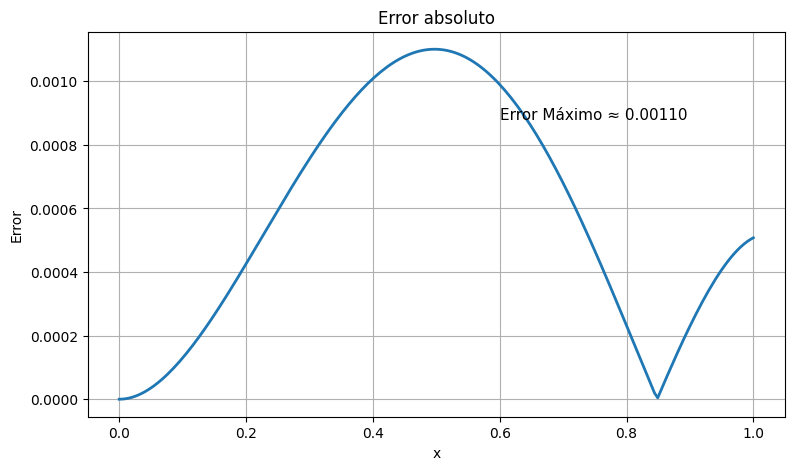

In [11]:
#Gráfica del error
error_expr = sp.Abs(u_exacta_expr - u_aprox_expr)
error_num = sp.lambdify(x, error_expr, 'numpy')
yy_error = error_num(xx)

plt.figure(figsize=(9,5))
plt.plot(xx, yy_error, linewidth=2)
plt.title("Error absoluto")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True)

error_max = np.max(yy_error)
plt.annotate(f'Error Máximo ≈ {error_max:.5f}',
             xy=(0.6, error_max*0.8),
             fontsize=11)

plt.show()
